In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.path.dirname("__file__"), "../src"))
sys.path.insert(0, project_root)

import math
import gf_selection

# Calculator

In [2]:
D = 30  # depth in meters
T = 30  # bottom time in minutes
pdcs = 0.02  # accepted rate of decompression sickness (DCS)
he_percentage = 10
o2_percentage = 21
surface_time = 2  # Surface time in hours
personal_adjustment = 0

In [3]:
# TODO: Apply Equivalent air depth?

In [4]:
prt = D/10+1 * math.sqrt(T)
print(f"Pressure Root Time (PRT) value for you dive is {prt:.1f}")
print("ZHL-16C has to be adjusted if PRT is over 25. [6]")

Pressure Root Time (PRT) value for you dive is 8.5
ZHL-16C has to be adjusted if PRT is over 25. [6]


### ↓ Adjust Gradient factors based on PRT

Without adjustments ZHL-16C can give dive profiles with too short Decompression Time (TDT) [6]. StandardAir model can be used to calculate necessary TDT based on US navy experimental dives [7].

Based on the StandardAir model[7], the total deco duration for this dive is 22 minutes.


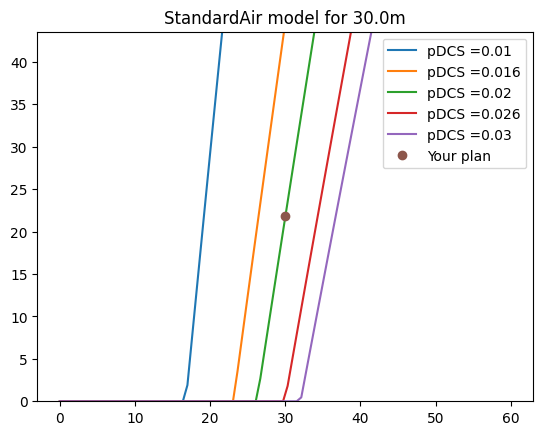

In [5]:
TDT = gf_selection.get_standair_tdt(D, T, pdcs)
gf_selection.standair_plot(D, T, pdcs)

print(f"Based on the StandardAir model[7], the total deco duration for this dive is {TDT:.0f} minutes.")

In [6]:
gf_high = gf_selection.fit_gf_to_tdt(T, D, TDT)
print(f"Total deco time of {TDT:.0f} minutes (on air) can be achieved with {gf_high}/{gf_high}")

Total deco time of 22 minutes (on air) can be achieved with 83/83


### ↑ Helium percentage
Based on (relatively) new research Helium does not change the decompression obligation [8]. However, if you are using a Trimix computer with the helium programmed in (as you should), it is going to add extra safety margin because of it. We can recalculate increase the gf_high to compensate for that unnecessary margin.

In [7]:
gf_high = gf_selection.fit_gf_to_tdt(T, D, TDT, he=he_percentage)
print(f"Total deco time of {TDT:.0f} (on 21/{he_percentage}) can be achieved with {gf_high}/{gf_high}")

Total deco time of 22 (on 21/10) can be achieved with 84/84


### ↓ Surface time
Angelini suggests reducing the gf values for surface intervals under 3 hours [5]

In [8]:
gf_high = gf_high - max(15 - 5*surface_time, 0)
print(f"Updated gf_high is {gf_high}")

Updated gf_high is 79


## Other things to consider

↓ Age, weight, body fat percentage

↑ Are you you going to do exercise within 24 hours before the diving? Some studies suggest it can decrease the chance of DCS. [1]

↑ Have you done other pre-dive interventions [1], such as:
- oxygen breathing
- exogenous nitric oxide administration
- whole body vibration
- sauna
- dark chocolate ingestion
- bouncing on a mini trampoline

In [9]:
gf_high += personal_adjustment

### Low gradient
Purpose of the low gradient is to create deep stops similar to bubble models, but those stops are shown to be not benificial [1][3][9]. $GF_{LO}$ is suggested to be set to at least 55% [6] or equal to $GF_{HI}$ [4].

It has also been suggested that $GF_{LO}$ can be used to counteract how ZH-L16c "b" deviate from modern algorithms developed by the U.S. Navy. This can be done by setting it 83% of $GF_{HI}$ https://indepthmag.com/gradient-factors-in-a-post-deep-stops-world/

### Final plan

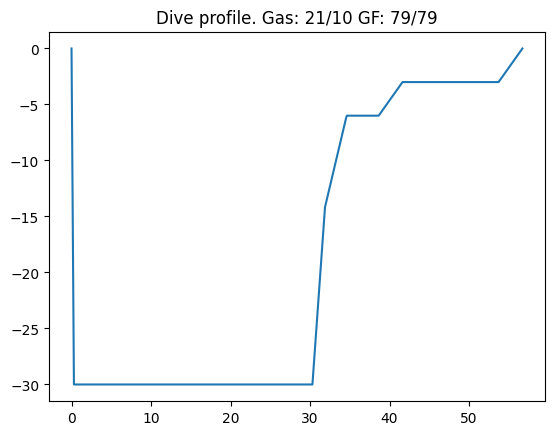

In [10]:
tdt_actual = gf_selection.get_gf_tdt(T, D, gf_high, he_percentage, o2_percentage, plot_figure=True)

# Things to consider during the dive

↓ Temperature, are you getting cold?
Especially important if you are cold during the decompression but not at the bottom. [1]

↓ How well hydrated are you?
Good hydration can reduce the risk of DCS, but overhydration also has it's problems. [1]

↓ Did you end up exercising in the bottom? Exercise can increase the risk of DCS [1]

↓ Do you want to do a safety stop after the mandatory stops? Safety stop is more significant on a decompression dive than no decompression dive. [5]

↓ Are you actually making critical decissions based on a Jupyter notebook? 

# References
[1] Mitchell, Simon J. "Decompression illness: a comprehensive overview." Diving and Hyperbaric Medicine 54.1Suppl (2024): 1.

[2] Fraedrich, Doug. "Evidence-Based Study on the Setting of High Gradient Factor." (2024).

[3] Spisni, Enzo, et al. "A comparative evaluation of two decompression procedures for technical diving using inflammatory responses: compartmental versus ratio deco." Diving and hyperbaric medicine 47.1 (2017): 9.

[4] De Ridder, Sven, et al. "Selecting optimal air diving gradient factors for Belgian military divers: more conservative settings are not necessarily safer." Diving and Hyperbaric Medicine 53.3 (2023): 251.

[5] Angelini, S. "Dive computer decompression models and algorithms: philosophical and practical views." Underw Technol 35.2 (2018): 51-61.

[6] Fraedrich, Doug. "Validation of algorithms used in commercial off-the-shelf dive computer." Diving and Hyperbaric Medicine 48.4 (2018): 252.

[7] Van Liew, H. D., and E. T. Flynn. A simple probabilistic model for estimating the risk of standard air dives. NEDU TR 04-42, Navy Experimental Diving Unit, 2004.

[8] Doolette, David J., Keith A. Gault, and Wayne A. Gerth. "Decompression from He-N 2-O 2 (trimix) bounce dives is not more efficient than from He-O 2 (heliox) bounce dives." Navy Experimental Diving Unit, Panama City (2015).

[9] Blatteau JE, Hugon M, Gardette B. Deeps stops during decompression from 50 to 100 msw didn’t reduce bubble formation in man. In: Bennett PB, Wienke BR, Mitchell SJ, editors. Decompression and the deep stop. Undersea and Hyperbaric Medical Society Workshop; 2008 Jun 24-25; Salt Lake City (UT). Durham (NC): Undersea and Hyperbaric Medical Society; 2009. p. 195-206.